<a href="https://colab.research.google.com/github/regiaharun/UAS-DataMeaning/blob/main/Gizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [35]:

# 2. Load Dataset
dataset_path = "DATASET CLUSTER GIZI (1).csv"
data = pd.read_csv(dataset_path, header=None, names=["ID", "Nama", "Jenis Kelamin", "Usia", "Tinggi Badan", "Berat Badan", "Nilai Gizi"])


In [36]:

data.head()


,ID,Nama,Jenis Kelamin,Usia,Tinggi Badan,Berat Badan,Nilai Gizi
0,NO,NAMA BALITA,JENIS KELAMIN,UMUR BULAN/TAHUN,Berat,Tinggi,BMI
1,1,Adhe Fitri,P,24,5.8,0.65,13.73
2,2,Andi Hariati,P,24,5.5,0.59,15.8
3,3,Anwar Amir,L,28,6.7,0.715,13.11
4,4,Asmar,L,30,8.1,0.725,15.41


In [37]:
# 3. Ringkasan Dataset dan EDA
print("\nInfo Dataset:")
data.info()



Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             500 non-null    object
 1   Nama           500 non-null    object
 2   Jenis Kelamin  500 non-null    object
 3   Usia           500 non-null    object
 4   Tinggi Badan   500 non-null    object
 5   Berat Badan    500 non-null    object
 6   Nilai Gizi     500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


In [38]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
         ID  Nama Jenis Kelamin Usia Tinggi Badan Berat Badan Nilai Gizi
count   500   500           500  500          500         500        500
unique  500   474             4   44           89         184        402
top      NO  anji             L   23           10        0.76       17.5
freq      1     4           259   57           30          22          4


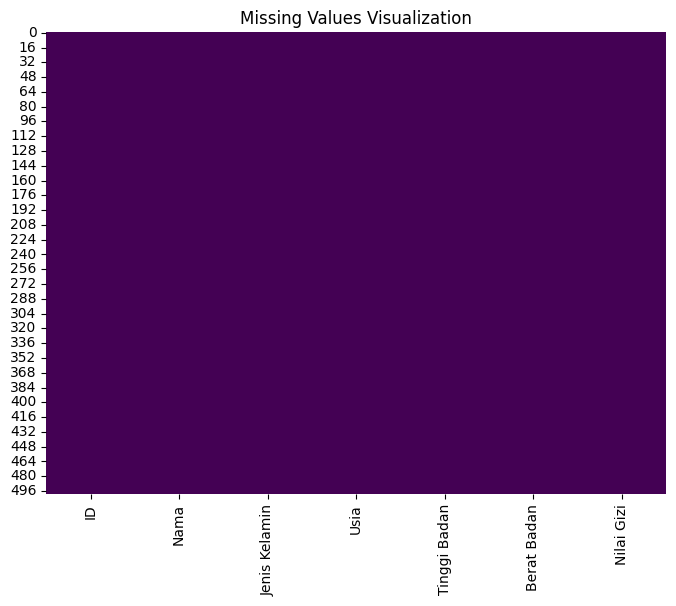

In [39]:
# Visualize missing data
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Visualization")
plt.show()

In [40]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



Number of duplicate rows: 0


In [41]:
# 4. Preprocessing Data
# Drop unnecessary columns
data_cleaned = data.drop(columns=["ID", "Nama"])

# Encode 'Jenis Kelamin'
data_cleaned["Jenis Kelamin"] = data_cleaned["Jenis Kelamin"].map({"L": 1, "P": 0})

# Ensure all columns are numeric
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data_cleaned = data_cleaned.dropna()

# Debug: Check processed data
print(data_cleaned.head())
print(f"Shape of data after preprocessing: {data_cleaned.shape}")

# Standardizing the dataset for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)


   Jenis Kelamin  Usia  Tinggi Badan  Berat Badan  Nilai Gizi
1            0.0  24.0           5.8        0.650       13.73
2            0.0  24.0           5.5        0.590       15.80
3            1.0  28.0           6.7        0.715       13.11
4            1.0  30.0           8.1        0.725       15.41
5            0.0  28.0           6.9        0.730       12.95
Shape of data after preprocessing: (492, 5)


In [42]:
# Ensure all columns except the first one are numeric
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')
data_cleaned = data_cleaned.dropna()


In [43]:
# Standardizing the dataset for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned.iloc[:, 1:])  # Assuming first column is an ID or non-numeric


In [44]:
# 5. Clustering with K-Means
# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)


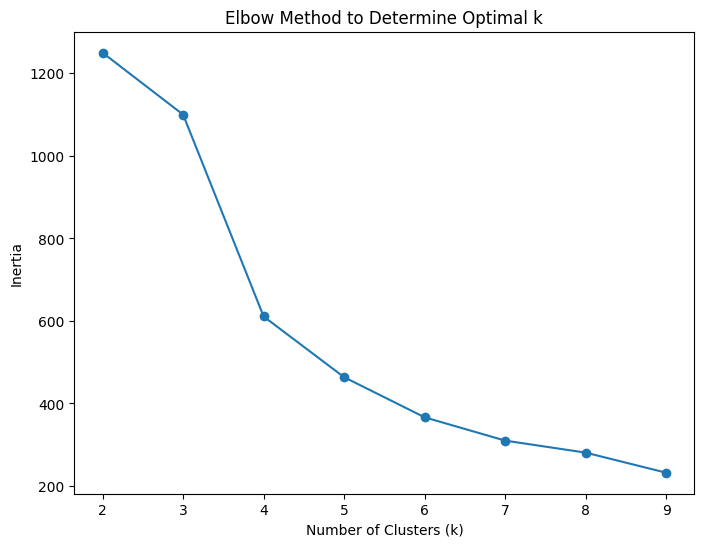

In [45]:
# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [46]:
# Fit the model with optimal k (e.g., k=3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [47]:
# Add cluster labels to the original dataset
data_cleaned['Cluster'] = kmeans.labels_

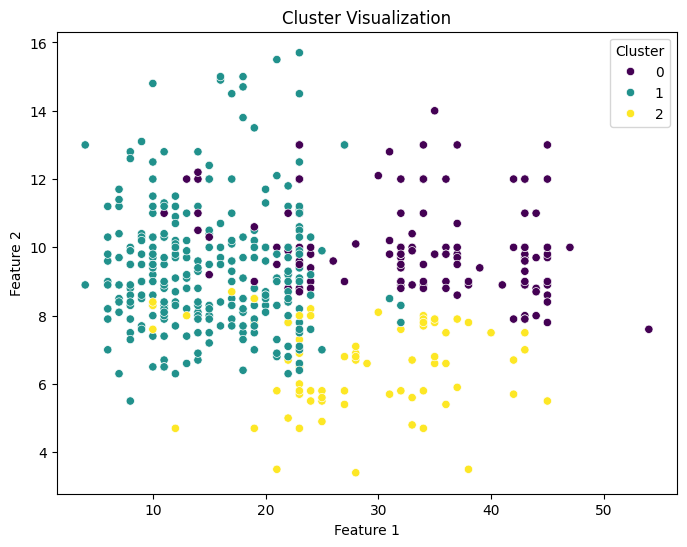

In [48]:
# 6. Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned.iloc[:, 1], y=data_cleaned.iloc[:, 2], hue=data_cleaned['Cluster'], palette='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

In [49]:
# 7. Silhouette Score
sil_score = silhouette_score(data_scaled, kmeans.labels_)
print(f"\nSilhouette Score: {sil_score:.2f}")


Silhouette Score: 0.40


In [50]:
# 8. Kesimpulan dan Diskusi
"""
1. Hasil clustering menunjukkan bahwa data berhasil dikelompokkan menjadi 3 cluster dengan skor siluet sebesar {sil_score:.2f}.
2. Visualisasi menunjukkan distribusi cluster berdasarkan fitur yang dianalisis.
3. Dataset memerlukan preprocessing seperti standardisasi untuk memastikan algoritma clustering bekerja optimal.
4. Dataset dapat digunakan untuk analisis lebih lanjut seperti pemberian rekomendasi intervensi gizi.
"""

'\n1. Hasil clustering menunjukkan bahwa data berhasil dikelompokkan menjadi 3 cluster dengan skor siluet sebesar {sil_score:.2f}.\n2. Visualisasi menunjukkan distribusi cluster berdasarkan fitur yang dianalisis.\n3. Dataset memerlukan preprocessing seperti standardisasi untuk memastikan algoritma clustering bekerja optimal.\n4. Dataset dapat digunakan untuk analisis lebih lanjut seperti pemberian rekomendasi intervensi gizi.\n'